Objetivo específico: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

16) Quais são os principais motivos de descarte? 
Qual valor total de descarte? Qual período com maior descarte? 
Qual sexo é mais descartado? 

Hipótese: 

IMPORTANDO MINHAS BIBLIOTECAS:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re as re

CRIANDO UMA DATAFRAME E FILTRANDO DADOS QUE NÃO FAZEM PARTE DA ANÁLISE E ALTERANDO AS DATAS.

In [2]:
#Filtros para trabalhar com os dados da minha dataframe original

descarte = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
descarte = descarte[(descarte['obs_desc'] != 'AAA') 
            & (descarte['obs_desc'] != '666')
            & (descarte['obs_desc'] != 'Test BioterC')
            & (descarte['obs_desc'] != 'Test')
            & (descarte['num_ani'] < 200)
            & (descarte['util'] == 'desc')
            & (descarte['ling'] != 'AAA')
            #& (descarte['num_sex_f'] != 666)
#             & (descarte ['m_f'] != 'AAA')
                   ]


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    descarte[d] = pd.to_datetime(descarte[d], unit = 's')
descarte.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootecnico,I
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Tranferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA


ANALISANDO ALGUNS DADOS DA MINHA DATAFRAME ORIGINAL

In [4]:
#verificando a quantidade de entradas 'Descarte Zootécnico da série 'obs_desc'
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

945

In [5]:
#não lembro desse código. - perguntar pro Guilherme e ver se posso apagar.
descarte['obs_desc'] = list(map(lambda x: str(x).strip(), descarte['obs_desc']))

In [6]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

948

In [7]:
#verificando informações da dataframe inicial - 1944 entradas ao todo.
descarte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 66 to 18379
Data columns (total 28 columns):
date_hoje         2286 non-null datetime64[ns]
user              2283 non-null object
ling              2286 non-null object
num_ani           2286 non-null int64
m_f               2286 non-null object
date_nasc         2286 non-null datetime64[ns]
id_orig           2286 non-null object
util              2286 non-null object
id_solic          2286 non-null int64
data_inicio       2286 non-null datetime64[ns]
time              2286 non-null object
total_time        2286 non-null int64
doses             2286 non-null int64
data_solic        2286 non-null int64
data_forn         2286 non-null int64
data_fim          2286 non-null int64
num_m             2286 non-null int64
num_f             2286 non-null int64
date_acas         2286 non-null datetime64[ns]
date_nasc_acas    2286 non-null datetime64[ns]
num_nasc          2286 non-null int64
date_sex          2286 non-null datetime64

In [86]:
descarte['obs_desc'].value_counts()

Descarte Zootécnico                                         966
Fim Experimento                                             316
Encontrado Morto                                            164
Velhos                                                      110
Erro de cadastro                                             97
Canibalismo                                                  73
Fornecido Zoológico                                          71
Para acasalamento                                            53
UEL                                                          40
Animais Doentes                                              37
Mudança                                                      25
Transferencia cx                                             23
Cascavel                                                     22
Troca de Macho                                               21
Monitoramento Sanitário                                      17
Ivermectina                             

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CONCATENAÇÕES DE MOTIVOS - 10% COM MAIS EVENTOS // 90% dos meus dados

In [8]:
#Replace erro de cadastro
erro = descarte['obs_desc'].replace(('erro de cadastro', 
                              'erro cadastro', 'error','erro de cadastro era 1 fêmea','erro  de cadastro',
                             'erro programa','Transferencia error','erro de contagem','erro de cadatro',
                             'erro de casa','erro sexagem','Erro Cadastro', 'Erro cadastro', 'Erro cadastro',
                              'Erro de Cadastro', 'Erro no cadastro','Animais fornecidos para Fabiano Figueiredo em 15/02/2018 - Erro no sistema (Exp. já encerrado).',
                              'Erro de registro','Erro de cadastro. Eram femeas', 'Erro de sexagem', 'Erro de cadastro, não estava na cx',
                             'Erro de lançamento no bioterc', 'teste de cadastro', 'ñ encontrado na cx',
                                    'nao estava na cx', 'Erro de cadastro', 'não estava na cx', 'não foi achado animal'), 'Erro de cadastro', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [9]:
#Replace fornecido zoológico
zoo = descarte['obs_desc'].replace(('ZOO', 'fornecido Zoológico', 
                              'Fornecido zoológico', 
                              'Fornecido Zoológico', 
                              'Fornecidos Zoológico',
                             'fornecido zoológico',
                             'zoo', 'zoologico'),'Fornecido Zoológico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [10]:
#Replace velhos
velhos = descarte['obs_desc'].replace(('velhos', 
                              'ANIMAIS VELHOS',
                             'Animais velhos',
                             'Animais Velhos',
                             'Animal velho'), 'Velhos', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [11]:
#Replace Descarte zootécnico
descart_zoo = descarte['obs_desc'].replace(('Descarte Zootecnico', 
                              'Caixa caiu no chão > Descarte Zootécnico',
                             'Animais com idade apropriada para descarte zootécnico',
                             'descarte'), 'Descarte Zootécnico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [12]:
#Replace monitoramento sanitário
monitoramento = descarte['obs_desc'].replace(('monitoramento sanitario', 
                                              'Kelly monitoramento', 'Monitoramento Sanitátio',
                                             'Monitoramento Sanitátio', 'Controle Sanitário'), 'Monitoramento Sanitátio', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [13]:
#Replace excesso de filhotes
ex_filho = descarte['obs_desc'].replace(('Excesso de filhotes', 'Filhotes em excesso'), 'Excesso de Filhotes', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [14]:
#Replace para acasalamento
acasa = descarte['obs_desc'].replace(('para acasalamento', 
                              'usada em acasalamento',
                             'P acasalamento experim Rosiane',
                             'Usado em acasalamento',
                             'p acasalamento',
                             'Para acasalamento 21136',
                             'Foi para o acasalamento B2',
                             'foi para acasalamento',
                             'para acasalamento 2:1',
                             'Foi para o acasalamento - Troca de macho',
                             'Usada em acasalamento',
                             'Para acasalamento 2:1',
                             'Foi encaminhada para acasalamento',
                             'Foi encaminhada para acasalamento na experimentação',
                             'Para o acasalamento 193',
                             'Usada no acasalamento 5.50',
                             'para acasalamento 3:!',
                             'Para acasalamento 25568',
                             'Usada no acasalamento 2.54',
                             'Enviado para acasalamento na experimentação.',
                             'Usada no acasalamento',
                             'femea usada em acasalamento 2:1',
                             'Para acasalamento da cesárea', 'Foi encaminhada para acasalamento na experimentação',
                                      'Foi encaminhada para acasalamento','Para Acasalamentos', 'Acasalamento Derivação Cesariana'
                            'Acasalamento Cesárea', 'Acasalamento Cesárea', 'Para acasal', 'ACASAL'), 'Para acasalamento', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [15]:
#Replace exp lorena
lorena = descarte['obs_desc'].replace('Lorena', 'Exp Lorena', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [16]:
#Replace ninhada grande
ninhada_g = descarte['obs_desc'].replace(('ninhada grande', 'Animais |Sacrificados ninhada grande',
                                         'ninhada muito grande', 'Filhote menor na ninhada'),'Ninhada Grande', inplace=True)

In [17]:
#Replace transferencia caixa
test_lista = ['nao estavam na cx', 'Transferido para a cx 526141', 'haviam apenas 10 na cx', 'Transferido para a cx 3-1-4-74',
                                        'Transf para a cx 436', 'Transferido para a cx 21237',
                                        'Transferência de cx', 'Troca de cx', 'Transferido para cx 513143',
                                        'Transferido para a cx 512142', 'Transferidos 3 para cx 3.38',
                                        'Transferido para a cx 514144', 'transferência de cx',
                                        'Tranferencia cx', 'Transferido para cx 522150',
                                        'para outra cx', 'Trocado de cx']
trans_cx = descarte['obs_desc'].replace(test_lista, 'Transferencia cx', inplace=True)
trans_cx

In [18]:
#Replace canibalismo
caniba = descarte['obs_desc'].replace('Fêmea comeu filhotes', 'Canibalismo',inplace=True)

In [19]:
descarte[descarte['obs_desc'] == 'Canibalismo'].head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1529,2015-06-22 23:40:59,Rafael,C57BL06WT,7,AAA,1970-01-01 00:11:06,1363,desc,666,1970-01-01 00:11:06,...,2015-05-05 18:36:54,2015-05-29 21:16:03,4,2015-06-19 21:16:03,666,666,7,4,Canibalismo,AAA
1627,2015-07-01 16:16:22,Rafael,S129KO,9,AAA,1970-01-01 00:11:06,1618,desc,666,1970-01-01 00:11:06,...,2015-06-24 13:30:21,2015-06-29 03:58:39,8,2015-07-20 03:58:39,666,666,9,8,Canibalismo,AAA
1629,2015-07-01 16:18:43,Rafael,Balb/c,6,AAA,1970-01-01 00:11:06,1616,desc,666,1970-01-01 00:11:06,...,2015-05-26 13:35:00,2015-06-29 03:56:59,5,2015-07-20 03:56:59,666,666,6,5,Canibalismo,AAA
1644,2015-07-05 16:18:31,Rafael,Balb/c,7,AAA,1970-01-01 00:11:06,1643,desc,666,1970-01-01 00:11:06,...,2015-03-12 18:16:51,2015-06-14 20:00:17,1,2015-07-05 20:00:17,666,4,7,1,Canibalismo,AAA
1645,2015-07-05 16:19:25,Rafael,S129KO,8,AAA,1970-01-01 00:11:06,1627,desc,666,1970-01-01 00:11:06,...,2015-06-24 13:30:21,2015-06-29 03:58:39,7,2015-07-20 03:58:39,666,666,8,7,Canibalismo,AAA


In [20]:
#lista com 10% das observações com maior numero de animais; 90% dos dados
lista_10por_super = list(descarte['obs_desc'].value_counts()[:21].index)
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Encontrado Morto',
 'Velhos',
 'Erro de cadastro',
 'Canibalismo',
 'Fornecido Zoológico',
 'Para acasalamento',
 'UEL',
 'Animais Doentes',
 'Mudança',
 'Transferencia cx',
 'Cascavel',
 'Troca de Macho',
 'Monitoramento Sanitário',
 'Ivermectina',
 'Excesso de Filhotes',
 'Exp Lorena',
 '.',
 'Ninhada Grande',
 'Fornecimento Guilhermina - Sem número do comitê de Ética']

In [21]:
#lista com observações inferiores aos 10%
lista_10por_infer = list(descarte['obs_desc'].value_counts()[21:].index)
lista_10por_infer[:10]

['Erro Experimento',
 'Fornecimento Recife - Sem número do comitê de Ética',
 'Monitoramento Sanitátio',
 'Troca de Fêmea',
 'TCC João',
 'Teste BioterC',
 'Presenca de fungo na caixa.',
 'nan',
 'Teste',
 'Acasalamento Derivação Cesariana']

Criada lista que vai receber todos os termos com condições;


In [22]:
#Lista com termos para pesquisa, sem a primera e ultima letra
lista_termos_pesq = list()
for i in lista_10por_super: #laço para que percorra na lista e itere em i
#     print(i)
    obs = i.split(' ') #uma nova variavel vai receber o que tem em i e separar pelos espaços
    for j in obs:      #novo laço que vai percorrer em obs e guardar em j
        if len(j) > 3: #condição para que os termos sejam maiores que 3 letras
            if len(j) > 4: #condição para seja maior que 4
                lista_termos_pesq.append(j[1:-1]) #append= adicionando essas informações na lista_termos_pesq e que retire a primeira e ultima letra 
            else:
                lista_termos_pesq.append(j[1:]) #se não só a primera.
lista_termos_pesq

['escart',
 'ootécnic',
 'xperiment',
 'ncontrad',
 'ort',
 'elho',
 'rro',
 'adastr',
 'anibalism',
 'ornecid',
 'oológic',
 'ara',
 'casalament',
 'nimai',
 'oente',
 'udanç',
 'ransferenci',
 'ascave',
 'roc',
 'ach',
 'onitorament',
 'anitári',
 'vermectin',
 'xcess',
 'ilhote',
 'oren',
 'inhad',
 'rand',
 'orneciment',
 'uilhermin',
 'úmer',
 'omit',
 'tic']

In [23]:
#Na dataframe descarte - coluna obs_desc, buscando padrões para fazer o replace de diferentes termos
#str - indica que é uma string/ contains onde buscarei o padrão / astype boleano/ e apresentando os valores dessa mesma coluna.

termos_repetidos = dict() #criado dicionario pra armazenar os motivos e as repetições dos seus termos;

for i in lista_termos_pesq:
    lista_resol = list(descarte[descarte['obs_desc'].str.contains(i, regex=False).astype('bool')]['obs_desc'].value_counts().index)
    termos_repetidos[i] = lista_resol
# for i, j in enumerate(termos_repetidos['escart']):
# #     print(j)
#         if i != 2:
#             print(j)
termos_repetidos

{'escart': ['Descarte Zootécnico',
  'Descarte',
  'Descarte por idade',
  'Não foram descartados estes animais, mas como o site não está permitindo lançar o ID 65 para esta caixa, porque ela é para experimento, e não para estoque, estou removendo da situação de estoque.'],
 'ootécnic': ['Descarte Zootécnico'],
 'xperiment': ['Fim Experimento',
  'Erro Experimento',
  'experimentos',
  'fornecido para experimento',
  'Fornecido para experimento do Henrique',
  'Retirados para Experimento ZIKA',
  'experimento Camila',
  'fornecido Giovanny experimento',
  'Fornecido para Experimento',
  'Abandono de Experimento',
  'Fornecida experimento 182 / Juliano',
  'Não foram descartados estes animais, mas como o site não está permitindo lançar o ID 65 para esta caixa, porque ela é para experimento, e não para estoque, estou removendo da situação de estoque.',
  'Neonatos para ExperimentoViromol',
  'Experimento sem pedido',
  'Fornecidos Experimento Pré Imune Reagente',
  'para experimento',
  

In [24]:
#replace descarte zootécnico - outro formato
descarte_z = descarte['obs_desc'].replace(termos_repetidos['escart'], 'Descarte Zootécnico', inplace=True)
descarte_z

In [25]:
#replace encontrado morto
morto = descarte['obs_desc'].replace(termos_repetidos['ort'], 'Encontrado Morto', inplace=True)
morto

In [26]:
#replace animais doentes
animais_doentes = descarte['obs_desc'].replace(termos_repetidos['oente'], 'Animais Doentes', inplace=True)
animais_doentes

In [27]:
#o que tiver em lista_termos_pesq coloque em i e faça isso:
for i in lista_termos_pesq:
    descarte['obs_desc'].replace(termos_repetidos[i], 'Descarte Zootécnico', inplace=True)
#     print(termos_repetidos[i])
    break

FIM DAS CONCATENAÇÕES DOS 10% SUPERIORES

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CONCATENANDO LINHAGENS - DATAFRAME ORIGINAL

In [28]:
descarte['ling'].value_counts()

Balb/c         523
S129KO         314
C57BL/6        306
C3H            174
129/SV-E       123
S129WT          89
Swiss-1 A       69
Swiss-1 B       63
Swiss-2 C       55
C57BL06WT       51
Swiss-2 B       47
Swiss-2 D       46
Swiss-1 D       46
Swiss-2 E       44
Swiss-1 E       43
Swiss-1 C       42
Swiss-2 A       41
Swiss C         31
Swiss E         30
Swiss D         28
Swiss A         28
Swiss B         25
DBA/1J          20
 S129WT         14
AG129           10
 S129KO          6
Swiss/CFW A      4
Swiss/CFW        4
Swiss/CFW D      4
Swiss/CFW B      3
Swiss/CFW C      2
Swiss-2 A        1
Name: ling, dtype: int64

In [29]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

descarte['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
#descarte[(descarte['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

descarte['ling'].replace(' S129KO', 'S129KO', inplace=True)
#descarte[(descarte['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

descarte['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
#descarte[(descarte['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

descarte['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

descarte['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

descarte['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

descarte['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

descarte['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

descarte['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()

In [30]:
descarte['ling'].value_counts()

Balb/c       523
C57BL/6      357
S129KO       320
129/SV-E     226
C3H          174
Swiss-1 A    105
Swiss-1 B     91
Swiss-1 D     78
Swiss-1 C     75
Swiss-1 E     73
Swiss-2 C     55
Swiss-2 B     47
Swiss-2 D     46
Swiss-2 E     44
Swiss-2 A     42
DBA/1J        20
AG129         10
Name: ling, dtype: int64

In [31]:
descarte[descarte['obs_desc'] == 'Canibalismo'].head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1529,2015-06-22 23:40:59,Rafael,C57BL/6,7,AAA,1970-01-01 00:11:06,1363,desc,666,1970-01-01 00:11:06,...,2015-05-05 18:36:54,2015-05-29 21:16:03,4,2015-06-19 21:16:03,666,666,7,4,Canibalismo,AAA
1627,2015-07-01 16:16:22,Rafael,S129KO,9,AAA,1970-01-01 00:11:06,1618,desc,666,1970-01-01 00:11:06,...,2015-06-24 13:30:21,2015-06-29 03:58:39,8,2015-07-20 03:58:39,666,666,9,8,Canibalismo,AAA
1629,2015-07-01 16:18:43,Rafael,Balb/c,6,AAA,1970-01-01 00:11:06,1616,desc,666,1970-01-01 00:11:06,...,2015-05-26 13:35:00,2015-06-29 03:56:59,5,2015-07-20 03:56:59,666,666,6,5,Canibalismo,AAA
1644,2015-07-05 16:18:31,Rafael,Balb/c,7,AAA,1970-01-01 00:11:06,1643,desc,666,1970-01-01 00:11:06,...,2015-03-12 18:16:51,2015-06-14 20:00:17,1,2015-07-05 20:00:17,666,4,7,1,Canibalismo,AAA
1645,2015-07-05 16:19:25,Rafael,S129KO,8,AAA,1970-01-01 00:11:06,1627,desc,666,1970-01-01 00:11:06,...,2015-06-24 13:30:21,2015-06-29 03:58:39,7,2015-07-20 03:58:39,666,666,8,7,Canibalismo,AAA


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CRIANDO UMA UNICA INSTÂNCIA --OUTROS-- PARA RESPONDER CADA PERGUNTA

In [32]:
#Lista que vai guardar meus 90% dos dados a serem analisados

lista_10por_super = list(descarte['obs_desc'].value_counts()[:18].index)
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Encontrado Morto',
 'Velhos',
 'Erro de cadastro',
 'Canibalismo',
 'Fornecido Zoológico',
 'Para acasalamento',
 'UEL',
 'Animais Doentes',
 'Mudança',
 'Transferencia cx',
 'Cascavel',
 'Troca de Macho',
 'Monitoramento Sanitário',
 'Ivermectina',
 'Excesso de Filhotes',
 'Exp Lorena']

In [33]:
#Nova DataFrame criada com os 90% dos motivos de descarte - DataFrame definitiva 
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)] #Essa função faz uma busca do que eu tenho na minha lista dentro da minha nova dataframe

descarte_filtrada.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss-1 B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootécnico,I
95,2014-09-17 13:14:12,Tania,129/SV-E,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transferencia cx,AAA
96,2014-09-17 13:14:12,Tania,129/SV-E,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Transferencia cx,AAA
97,2014-09-17 13:14:12,Tania,129/SV-E,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transferencia cx,AAA
98,2014-09-17 13:14:12,Tania,129/SV-E,3,f,2014-07-28 04:00:00,70,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Transferencia cx,AAA


In [34]:
#testando se as linhagens concatenadas estão na minha nova DataFrame.
descarte_filtrada['ling'].value_counts()

Balb/c       464
C57BL/6      330
S129KO       308
129/SV-E     216
C3H          160
Swiss-1 A     92
Swiss-1 B     80
Swiss-1 D     71
Swiss-1 C     64
Swiss-1 E     61
Swiss-2 C     46
Swiss-2 D     43
Swiss-2 E     41
Swiss-2 A     37
Swiss-2 B     36
DBA/1J        20
AG129          8
Name: ling, dtype: int64

In [35]:
#DataFrame 10% dos dados - que pegarei todas as informações e foi transformada em uma unica instância.

descarte_filtrada_10inf = descarte[descarte['obs_desc'].isin(lista_10por_infer)]

descarte_filtrada_10inf.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
73,2014-09-02 12:20:36,Tania,Swiss-1 B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
161,2014-10-01 12:37:47,Tania,Swiss-1 A,4,m,2014-06-10 00:00:00,145,desc,6,2014-10-01 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Teste,AAA
162,2014-10-01 12:42:40,Tania,Balb/c,20,f,2014-06-10 00:00:00,158,desc,1,2014-11-05 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,20,0,Teste,AAA
248,2014-10-03 17:14:44,Tania,S129KO,4,m,2014-06-24 00:00:00,102,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,2,experimento,AAA
263,2014-10-06 18:27:59,Tania,Balb/c,6,f,2014-08-22 00:00:00,140,desc,7,2014-10-01 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,6,4,nan,AAA


In [91]:
#descarte_filtrada_10inf[]
descarte_filtrada_10inf[descarte_filtrada_10inf['m_f']=='AAA']['num_ani'].sum()

204

PERGUNTA 1 - QUAL NUMERO TOTAL DE ANIMAIS DESCARTADOS POR MOTIVO DE DESCARTE?

In [37]:
#Criando a unica instância com todas as informações a partir da DataFrame dos 10% inferiores.

#Soma total de animais
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)] #zerando a dataframe
outros_numtotal = descarte_filtrada_10inf.iloc[0] #buscando a posição 0 na minha dataframe e guardando numa variável do tipo série
outros_numtotal['num_ani'] = descarte_filtrada_10inf['num_ani'].sum() #somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_numtotal['obs_desc'] = 'Outros' #Renomeada como outros o que tem na coluna 'obs_desc'
outros_numtotal['m_f'] = 'nao'
descarte_filtrada = descarte_filtrada.append(outros_numtotal) #Adicionando nova instância na dataframe 90%.
descarte_filtrada.tail() 

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 B,691,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros,I


In [67]:
#outros_numtotal

In [39]:
#Verificando se a nova instância está na minha DataFrame e se permanece unica (Sem repetições)
descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 66 to 73
Data columns (total 28 columns):
date_hoje         2078 non-null datetime64[ns]
user              2075 non-null object
ling              2078 non-null object
num_ani           2078 non-null int64
m_f               2078 non-null object
date_nasc         2078 non-null datetime64[ns]
id_orig           2078 non-null object
util              2078 non-null object
id_solic          2078 non-null int64
data_inicio       2078 non-null datetime64[ns]
time              2078 non-null object
total_time        2078 non-null int64
doses             2078 non-null int64
data_solic        2078 non-null int64
data_forn         2078 non-null int64
data_fim          2078 non-null int64
num_m             2078 non-null int64
num_f             2078 non-null int64
date_acas         2078 non-null datetime64[ns]
date_nasc_acas    2078 non-null datetime64[ns]
num_nasc          2078 non-null int64
date_sex          2078 non-null datetime64[ns

GERANDO GRÁFICO A PARTIR DA PERGUNTA 1

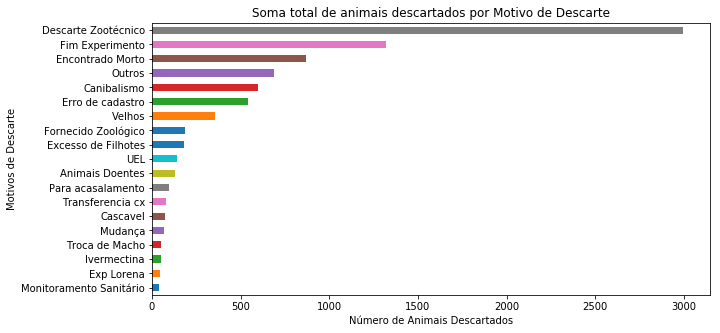

In [40]:
#testando grafico do numero total de animais.

plt.figure(figsize=(10,5))
plt.title('Soma total de animais descartados por Motivo de Descarte')


plot_total_animais = descarte_filtrada.groupby('obs_desc')
plot_total_animais['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh'
)
plt.xlabel('Número de Animais Descartados') #definindo nome do eixo X
plt.ylabel('Motivos de Descarte') #definindo nome do eixo Y
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../resultados/16_1p_numerototal.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [41]:
term = 'm'
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
outr_m = descarte_filtrada_10inf.iloc[0]
outr_m['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == term]['num_ani'].sum()
outr_m['obs_desc'] = 'Outros Machos'
outr_m['m_f'] = term
descarte_filtrada = descarte_filtrada.append(outr_m)
#descarte_filtrada[descarte_filtrada['m_f'] == term]['num_ani'].sum()
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 B,213,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros Machos,I


In [42]:
#outr_m
descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == 'm']['num_ani'].sum()

213

In [43]:
#conferindo se a instância está na minha dataframe e se não há repetições.
descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 66 to 73
Data columns (total 28 columns):
date_hoje         2078 non-null datetime64[ns]
user              2075 non-null object
ling              2078 non-null object
num_ani           2078 non-null int64
m_f               2078 non-null object
date_nasc         2078 non-null datetime64[ns]
id_orig           2078 non-null object
util              2078 non-null object
id_solic          2078 non-null int64
data_inicio       2078 non-null datetime64[ns]
time              2078 non-null object
total_time        2078 non-null int64
doses             2078 non-null int64
data_solic        2078 non-null int64
data_forn         2078 non-null int64
data_fim          2078 non-null int64
num_m             2078 non-null int64
num_f             2078 non-null int64
date_acas         2078 non-null datetime64[ns]
date_nasc_acas    2078 non-null datetime64[ns]
num_nasc          2078 non-null int64
date_sex          2078 non-null datetime64[ns

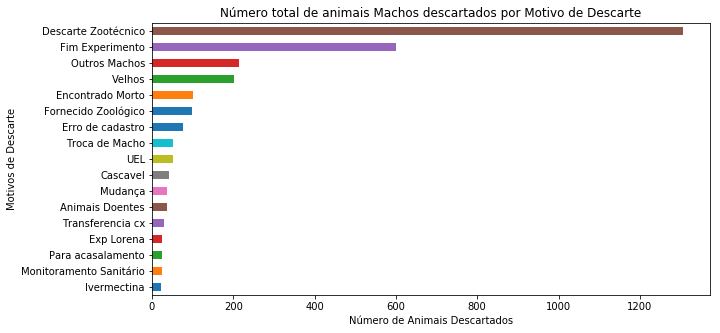

In [44]:
plt.figure(figsize=(10,5))
plt.title('Número total de animais Machos descartados por Motivo de Descarte')

plot_machos = descarte_filtrada[descarte_filtrada['m_f'] == 'm'].groupby('obs_desc')
plot_machos['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh'
)
plt.xlabel('Número de Animais Descartados')
plt.ylabel('Motivos de Descarte')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../resultados/16_2p_numerototal_m.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

PERGUNTA 3 - QUAL O NUMERO TOTAL DE FÊMEAS DESCARTADAS POR MOTIVOS DE DESCARTE?

In [45]:
term = 'f'
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
outr_f = descarte_filtrada_10inf.iloc[0]
outr_f['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == term]['num_ani'].sum()
outr_f['obs_desc'] = 'Outros Fêmeas'
outr_f['m_f'] = term
descarte_filtrada = descarte_filtrada.append(outr_f)
#descarte_filtrada[descarte_filtrada['m_f'] == term]['num_ani'].sum()
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 B,274,f,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros Fêmeas,I


In [46]:
#outr_f

In [88]:
test = descarte_filtrada[descarte_filtrada['m_f'] == 'm'].groupby('obs_desc')
test.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
obs_desc,,,,,,,,,,,,,,
Animais Doentes,37,9990,9990,9990,9990,9990,8962119362,9990,9990,9990,9990,9990,37,17
Cascavel,43,9324,9324,9324,9324,9324,20356934302,9324,9324,9324,9324,9324,43,0
Descarte Zootécnico,1307,313686,313686,313686,313686,313686,683164774740,313686,313686,313686,313686,313686,1307,52
Encontrado Morto,102,17792,17319,17322,3011361302,3011685269,12035873375,18648,18648,18648,18648,18648,102,56
Erro de cadastro,77,17794,17319,17321,3006176384,3006426785,35543318652,18648,18648,18648,18648,18648,77,13
Exp Lorena,25,5328,5328,5328,5328,5328,11470400893,5328,5328,5328,5328,5328,25,0
Fim Experimento,599,47559,18581,17697,193744710404,193831735443,224769748833,103230,103230,103230,103230,103230,599,16
Fornecido Zoológico,99,24642,24642,24642,24642,24642,54890202987,24642,24642,24642,24642,24642,99,0
Ivermectina,23,5328,5328,5328,5328,5328,7250045160,5328,5328,5328,5328,5328,23,4


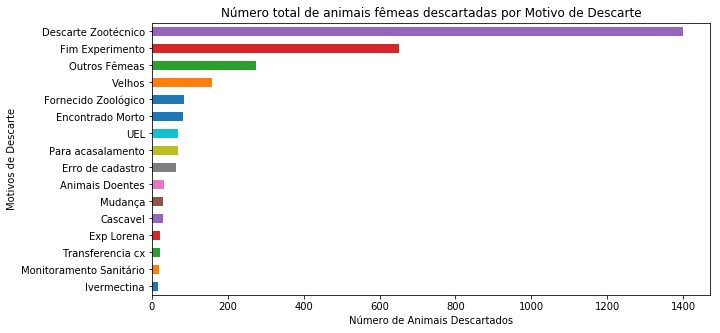

In [47]:
plt.figure(figsize=(10,5))
plt.title('Número total de animais fêmeas descartadas por Motivo de Descarte')

plot_femeas = descarte_filtrada[descarte_filtrada['m_f'] == 'f'].groupby('obs_desc')

plot_femeas['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh'
)
plt.xlabel('Número de Animais Descartados')
plt.ylabel('Motivos de Descarte')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../resultados/16_3p_numerototal_f.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

PERGUNTA 4 - ISOGÊNICOS OU HETEROGÊNICOS SÃO MAIS DESCARTADOS POR MOTIVO DE DESCARTE?

In [48]:
descarte_filtrada['ling'].value_counts()

Balb/c       464
C57BL/6      330
S129KO       308
129/SV-E     216
C3H          160
Swiss-1 A     92
Swiss-1 B     81
Swiss-1 D     71
Swiss-1 C     64
Swiss-1 E     61
Swiss-2 C     46
Swiss-2 D     43
Swiss-2 E     41
Swiss-2 A     37
Swiss-2 B     36
DBA/1J        20
AG129          8
Name: ling, dtype: int64

++++++++++++++++++++++++++++++++++++ GRUPO ISOGÊNICO +++++++++++++++++++++++++++++++++++++++++++++++++++

In [50]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129','Grupo Isogênico']

descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]

outr_iso = descarte_filtrada_10inf.iloc[0]
outr_iso['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'].isin(ling_iso)]['num_ani'].sum()
outr_iso['ling'] = 'Grupo Isogênico'
outr_iso['obs_desc'] = 'Outros Linhagens Isogênicas'
outr_iso['m_f'] = 'nao'

descarte_filtrada = descarte_filtrada.append(outr_iso)
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Grupo Isogênico,438,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros Linhagens Isogênicas,I


In [69]:
#outr_iso

In [52]:
#conferindo se realmente meu grupo tinha sido incluido na minha DataFrame.
g_iso = descarte_filtrada[descarte_filtrada['ling'].isin(ling_iso)].groupby('ling')
g_iso.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,646,143856,143856,143856,143856,143856,298225429791,135211,135212,135236,142530,139871,646,53
AG129,15,5328,5328,5328,5328,5328,12289552737,4663,4663,4662,4663,5328,15,0
Balb/c,1776,251515,221908,221212,199896400933,200010110907,608644733204,275774,275800,275920,299739,293788,1776,274
C3H,455,105954,105230,105230,3099392814,3099394564,209102212273,92595,92601,92638,96614,103909,455,83
C57BL/6,1366,218873,218476,218464,2992208822,3002716298,354357357546,157935,157984,158196,213155,191273,1366,436
DBA/1J,44,12772,11990,11990,3113630396,3113630586,31137080914,13320,13320,13320,13320,13320,44,0
Grupo Isogênico,438,666,666,666,666,666,1409660436,666,666,666,666,666,1,0
S129KO,1057,191677,175273,175203,69743088794,69781647958,408978409035,181854,181882,181931,195852,201814,1057,151


In [53]:
#soma total de animais isogênicos descartados.
descarte_filtrada[descarte_filtrada['ling'].isin(ling_iso)]['num_ani'].sum()

5797

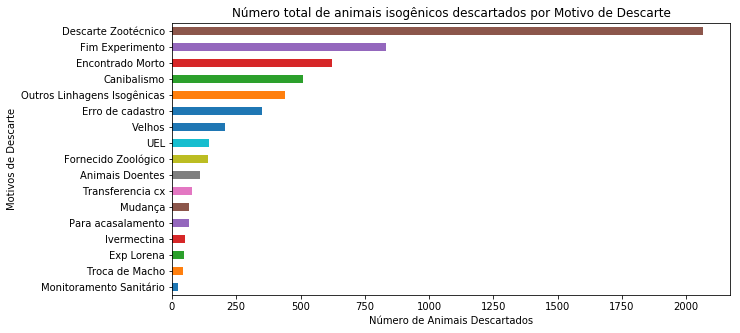

In [54]:
plt.figure(figsize=(10,5))
plt.title('Número total de animais isogênicos descartados por Motivo de Descarte')

plot_iso = descarte_filtrada[descarte_filtrada['ling'].isin(ling_iso)].groupby('obs_desc') #agrupando por linhagem

plot_iso['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh'
)


plt.xlabel('Número de Animais Descartados')
plt.ylabel('Motivos de Descarte')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../resultados/16_4p_numerototal_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++++++ GRUPO HETEROGÊNICO ++++++++++++++++++++++++++++++++++++++++++++++

In [55]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 D','Swiss-2 C','Swiss-2 D','Swiss-2 E','Grupo Hetorogênico']  

descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]

outr_het = descarte_filtrada_10inf.iloc[0]
outr_het['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'].isin(ling_het)]['num_ani'].sum()
outr_het['ling'] = 'Grupo Hetorogênico'
outr_het['obs_desc'] = 'Outros Linhagens Heterogênicas'
outr_het['m_f'] = 'nao'

descarte_filtrada = descarte_filtrada.append(outr_het)
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingW

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Grupo Hetorogênico,226,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros Linhagens Heterogênicas,I


In [70]:
outr_het

date_hoje                    2014-09-02 12:20:36
user                                       Tania
ling                          Grupo Hetorogênico
num_ani                                      226
m_f                                          nao
date_nasc                    2014-06-10 04:00:00
id_orig                                       55
util                                        desc
id_solic                                     666
data_inicio                  1970-01-01 00:11:06
time                                         AAA
total_time                                   666
doses                                        666
data_solic                                   666
data_forn                                    666
data_fim                              1409660436
num_m                                        666
num_f                                        666
date_acas                    1970-01-01 00:11:06
date_nasc_acas               1970-01-01 00:11:06
num_nasc            

In [57]:
#conferindo se realmente meu grupo tinha sido incluido na minha DataFrame.
g_het = descarte_filtrada[descarte_filtrada['ling'].isin(ling_het)].groupby('ling')
g_het.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Grupo Hetorogênico,226,666,666,666,666,666,1409660436,666,666,666,666,666,1,0
Swiss-1 A,374,55196,52764,52660,19353023876,19357583906,108605434317,47307,47314,47354,55308,57960,374,87
Swiss-1 B,314,49251,47968,47990,11791460764,11793290373,95544596788,46630,46633,46667,50629,52617,314,66
Swiss-1 C,330,37555,36032,35991,14725727358,14728182642,76969541725,36639,36643,36723,39309,42624,330,105
Swiss-1 D,295,42455,40646,40669,14832309474,14833952680,83361808883,40636,40639,40691,46624,47286,295,81
Swiss-1 E,301,38218,38035,37975,5740631912,5743489973,73157640115,31981,31984,32036,38637,40626,301,74
Swiss-2 A,192,21826,20075,20001,10597445708,10600516990,45409155301,19322,19322,19377,23977,23979,192,63
Swiss-2 C,186,26638,24096,24003,15155430980,15165969378,55850624930,26646,26646,26693,30636,29971,186,61
Swiss-2 D,179,22716,19513,19346,21095954263,21107883111,57587411816,26643,26643,26665,28638,28638,179,36


In [58]:
#Soma dos animais heterogênicos descartados.
descarte_filtrada[descarte_filtrada['ling'].isin(ling_het)]['num_ani'].sum()

2548

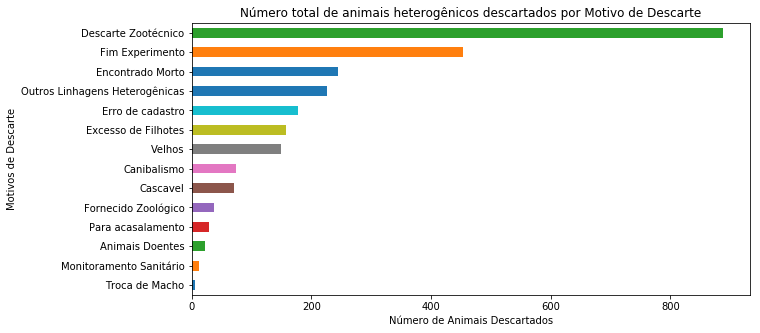

In [59]:
plt.figure(figsize=(10,5))
plt.title('Número total de animais heterogênicos descartados por Motivo de Descarte')

plot_het = descarte_filtrada[descarte_filtrada['ling'].isin(ling_het)].groupby('obs_desc') #agrupando por linhagem

plot_het['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh'
)
plt.xlabel('Número de Animais Descartados')
plt.ylabel('Motivos de Descarte')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../resultados/16_5p_numerototal_het.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

PERGUNTA 5 - QUAL A LINHAGEM MAIS DESCARTADA POR MOTIVOS DE DESCARTE ?

In [75]:
group = descarte_filtrada.groupby('ling')
group['num_ani'].sum().sort_values(ascending=False)

ling
Balb/c       2008
C57BL/6      1366
S129KO       1057
129/SV-E      646
C3H           455
Swiss-1 A     374
Swiss-1 C     330
Swiss-1 B     314
Swiss-1 E     301
Swiss-1 D     295
Swiss-2 A     192
Swiss-2 C     186
Swiss-2 D     179
Swiss-2 E     151
Swiss-2 B     144
DBA/1J         44
AG129          15
Name: num_ani, dtype: int64

In [81]:
#'Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129'//'Swiss-1 A','Swiss-2 A'
ling = 'Swiss-1 A'
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
outros_ling = descarte_filtrada_10inf.iloc[0] 
outros_ling['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'] == ling]['num_ani'].sum()#somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_ling['obs_desc'] = 'Outros ' + ling  #Renomeada como outros o que tem na coluna 'obs_desc'
outros_ling['ling'] = ling
descarte_filtrada = descarte_filtrada.append(outros_ling)
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 A,38,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros Swiss-1 A,I


In [82]:
outros_ling

date_hoje         2014-09-02 12:20:36
user                            Tania
ling                        Swiss-1 A
num_ani                            38
m_f                                 m
date_nasc         2014-06-10 04:00:00
id_orig                            55
util                             desc
id_solic                          666
data_inicio       1970-01-01 00:11:06
time                              AAA
total_time                        666
doses                             666
data_solic                        666
data_forn                         666
data_fim                   1409660436
num_m                             666
num_f                             666
date_acas         1970-01-01 00:11:06
date_nasc_acas    1970-01-01 00:11:06
num_nasc                          666
date_sex          1970-01-01 00:11:06
num_sex_m                         666
num_sex_f                         666
num_ani_ini                         1
num_ani_fim                         0
obs_desc    

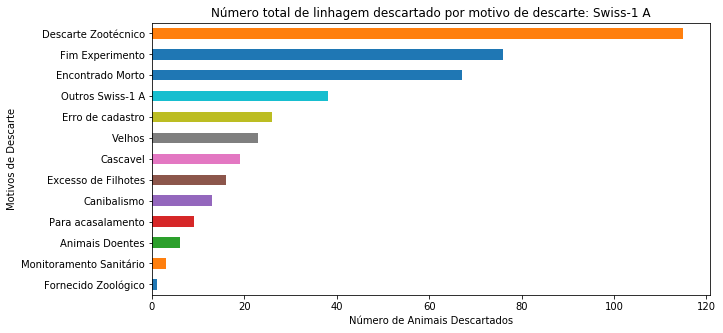

In [83]:
#'Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129'//'Swiss-1 A','Swiss-2 A'

#linhagens = 'C3H'
plt.figure(figsize=(10,5))
plt.title('Número total de linhagem descartado por motivo de descarte: '+ ling)

plot_Balb = descarte_filtrada[descarte_filtrada['ling'] == ling].groupby('obs_desc')

plot_Balb['num_ani'].sum().sort_values(ascending=True).plot(
    kind='barh'
)
plt.xlabel('Número de Animais Descartados')
plt.ylabel('Motivos de Descarte')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../resultados/16_5p_numerototal_ling.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [63]:
descarte_filtrada['obs_desc'].drop_duplicates()

id
66          Descarte Zootécnico
95             Transferencia cx
125            Erro de cadastro
241                      Velhos
414           Para acasalamento
573            Encontrado Morto
767             Fim Experimento
1389                 Exp Lorena
1191                        UEL
1529                Canibalismo
1945            Animais Doentes
2258             Troca de Macho
2525                Ivermectina
2817                   Cascavel
2997                    Mudança
4393        Excesso de Filhotes
4904    Monitoramento Sanitário
4910        Fornecido Zoológico
73               Outros C57BL/6
Name: obs_desc, dtype: object

In [64]:
#Função nlargest com os parametros vai apresentar os maiores valores dentro de um limite
#Por exemplo 25 maiores valores na coluna num_ani
descarte.nlargest(25, 'num_ani').head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
129,2014-09-23 18:16:16,Tania,Swiss-1 C,60,AAA,1970-01-01 00:11:06,124,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 18:13:25,20,2014-10-14 18:13:25,666,666,60,20,Erro de cadastro,AAA
142,2014-10-01 11:34:51,Tania,Swiss-1 E,34,AAA,1970-01-01 00:11:06,134,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-29 18:10:21,24,2014-10-20 18:10:21,666,666,34,24,.,AAA
143,2014-10-01 11:35:29,Tania,Swiss-1 E,24,AAA,1970-01-01 00:11:06,142,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-29 18:10:21,18,2014-10-20 18:10:21,666,666,24,18,.,AAA
8276,2017-08-04 18:02:25,Giovanny,C57BL/6,22,f,2017-05-16 03:00:00,8128,desc,199,2017-06-20 03:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,22,0,Fim Experimento,AAA
3270,2016-03-23 19:13:34,Susiane,Swiss-1 B,21,f,2015-06-23 22:55:16,1932,desc,75,2015-08-26 04:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,21,0,Fim Experimento,I


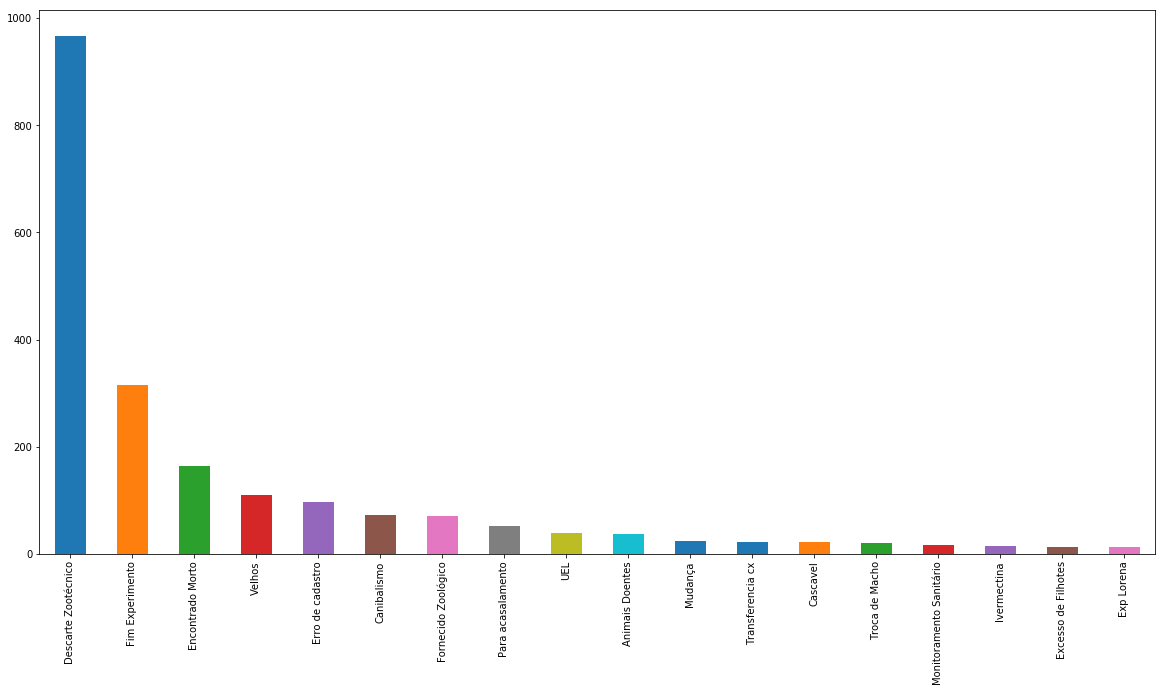

In [65]:
#motivo de descarte
plt.figure(figsize=(20,10))
descarte[(descarte['obs_desc'] != 'AAA')
     & (descarte['obs_desc'] != '666')
    & (descarte['num_ani'] < 200)
    ]['obs_desc'].value_counts()[:18].plot(
    kind='bar'
)

#desc[desc['obs_desc'] == 'Descarte Zootécnico']['num_ani'].sum()